Проведение A/B теста на двух группах курьеров. Имеются данные компании по доставке пиццы. К вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать.<br>

**Описание данных**<br>
order_id - id заказа<br>
delivery_time - время доставки в минутах<br>
district - район доставки<br>
experiment_group - экспериментальная группа<br>


**Нулевая гипотеза (H0):** Разницы между средним временем доставки в тестовой и контрольной группе нет<br>
**Альтернативная гипотеза (H1):** Разница между средним временем доставки в тестовой и контрольной группе есть<br>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid',
       rc={'figure.figsize':(15,7)})

In [2]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/385916/experiment_lesson_4.csv')
data

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


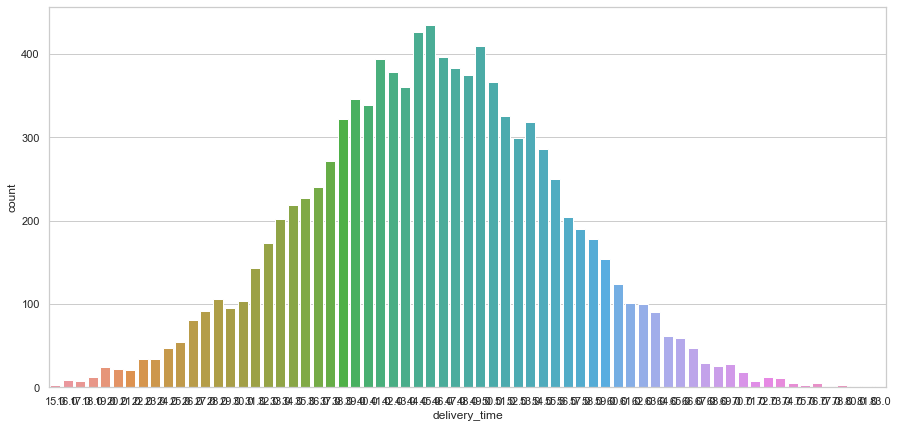

In [3]:
# Построим графики распределения для каждой из групп (контрольной и тестовой):

sns.countplot(data.query('experiment_group == "control"').delivery_time)

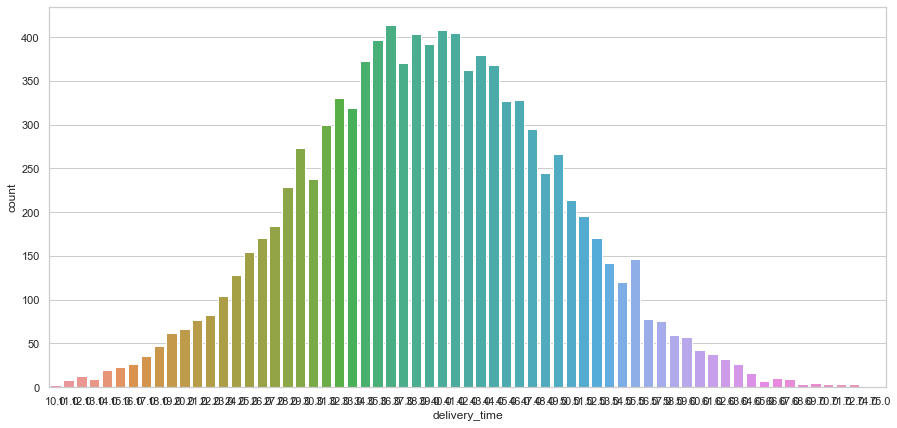

In [4]:
sns.countplot(data.query('experiment_group == "test"').delivery_time)

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

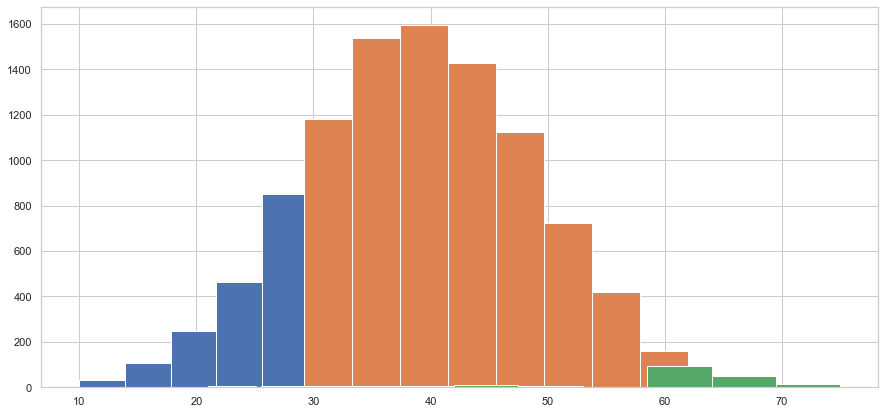

In [5]:
# Теперь такие же графики, только с разбивкой по району:

data.query('experiment_group == "test"').groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

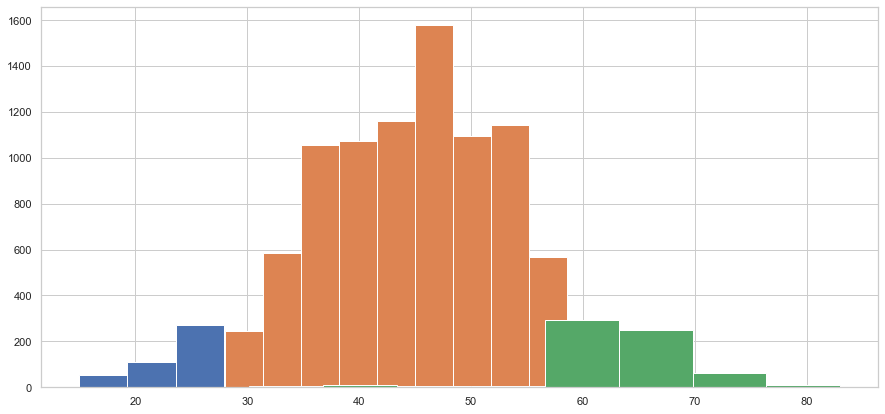

In [6]:
data.query('experiment_group == "control"').groupby('district').delivery_time.hist()

In [28]:
# Кол-во наблюдений в группах практически не отличается:

data.experiment_group.value_counts()[0] - data.experiment_group.value_counts()[1]

12

In [7]:
# Для проверки распределения на нормальность воспользуемся Шапиро-Уилк тестом (обязательно проведем сэмплирование, т.к.
# на больших выборках тест может показать неверный результат)

stats.shapiro(data.query('experiment_group == "control"').delivery_time.sample(1000, random_state=17))

(0.9974725842475891, 0.12411931157112122)

In [8]:
stats.shapiro(data.query('experiment_group == "test"').delivery_time.sample(1000, random_state=17))

(0.9975475668907166, 0.14005419611930847)

В обеих группах тест на нормальность показывает, что распределение нормально (p-value = [0.12,0.14] > 0.05)

In [9]:
# Стандартное отклонение для обеих групп:

round(data.query('experiment_group == "control"').delivery_time.std(),2)

9.99

In [10]:
round(data.query('experiment_group == "test"').delivery_time.std(),2)

9.88

In [11]:
# T-test для контрольной и тестовой групп:

stats.ttest_ind(data.query('experiment_group == "control"').delivery_time, 
                data.query('experiment_group == "test"').delivery_time)

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

pvalue=0.0 < 0.05, значит, вероятность получить такие и более значимые различия в среднем времени доставки меньше 5% при условии, что верная нулевая гипотеза. Значит, нулевую гипотезу отклоняем - получили значимые различия.

In [16]:
# Среднее время доставки в тестовой группе изменилось на:

data.query('experiment_group == "test"').delivery_time.mean() - data.query('experiment_group == "control"').delivery_time.mean()

-6.018287926844998

Итого, раскатываем изменения на всё приложение для курьеров, т.к. получаем значимые различия - скорость доставки уменьшится